In [3]:
# Research Question: What other aspects of wellness predict whether one uses physical activity as a coping mechanism?

# Survey was given to first-year incoming freshmen students at Truman State University. In this research, I attempt to answer the above question. 

In [4]:
# Load libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingClassifier
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.inspection import permutation_importance

In [5]:
# Load data

data = pd.read_csv("PreTest_ReadyForRStudio.csv")

In [6]:
# Basic full data observations

data.describe()

,Year,Over_18,Full_Time,First_Year_Student,Age,Gender,Sexual_Orientation,Race,Family_Grad_History,Gross_Family_Income,...,Track_Spending,Save_Money,Financial_Anxiety,Career_Financial_Impact,Financial_Obligations_Overwhelming,Job_Necessity,Parent_Financial_Support,Future_Financial_Plan,Contribution,Financial_Score
count,1075.000000,1074.0,1075.0,1074.000000,1074.000000,1058.000000,1059.000000,1071.000000,1070.000000,1054.000000,...,1074.000000,1075.000000,1074.000000,1075.000000,1075.000000,1074.000000,1075.000000,1073.000000,1073.000000,1075.000000
mean,2.399070,1.0,1.0,1.022346,1.163873,1.950851,3.595845,1.455649,1.871963,2.854839,...,2.593110,3.546047,2.187151,3.308837,2.543256,2.801676,3.372093,2.893756,2.809879,29.197209
std,1.153006,0.0,0.0,0.165708,0.502703,0.907993,1.425869,1.439640,0.570116,1.081130,...,1.010287,0.627186,0.977559,0.734534,1.050290,1.074467,0.835191,0.888299,0.884788,4.380016
min,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000
25%,1.000000,1.0,1.0,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,...,2.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,26.000000
50%,2.000000,1.0,1.0,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,3.000000,...,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,29.000000
75%,3.000000,1.0,1.0,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,4.000000,...,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,32.000000
max,4.000000,1.0,1.0,3.000000,7.000000,7.000000,15.000000,8.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,40.000000


In [7]:
# Basic data observations honed in on the Physical_Activity_Scress variable. This is an essential variable for this research.
# Note: The Physical_Activity_Stress variable was an answer to the following question on a scale from 1-4: 
# I use physical activity as a coping mechanism to help deal with stress

data["Physical_Activity_Stress"].describe()

count    1074.000000
mean        2.675047
std         1.010472
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Physical_Activity_Stress, dtype: float64

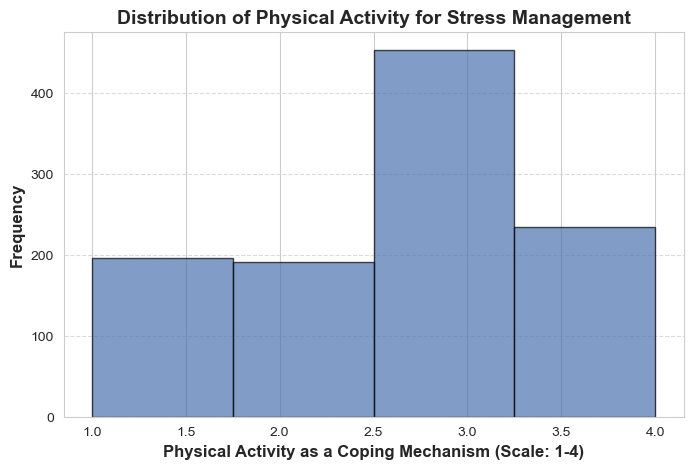

In [8]:
# Basic histogram of the Physical_Activity_Stress variable

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
plt.hist(data["Physical_Activity_Stress"], bins=4, color="#4C72B0", edgecolor="black", alpha=0.7)
plt.xlabel('Physical Activity as a Coping Mechanism (Scale: 1-4)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Physical Activity for Stress Management', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

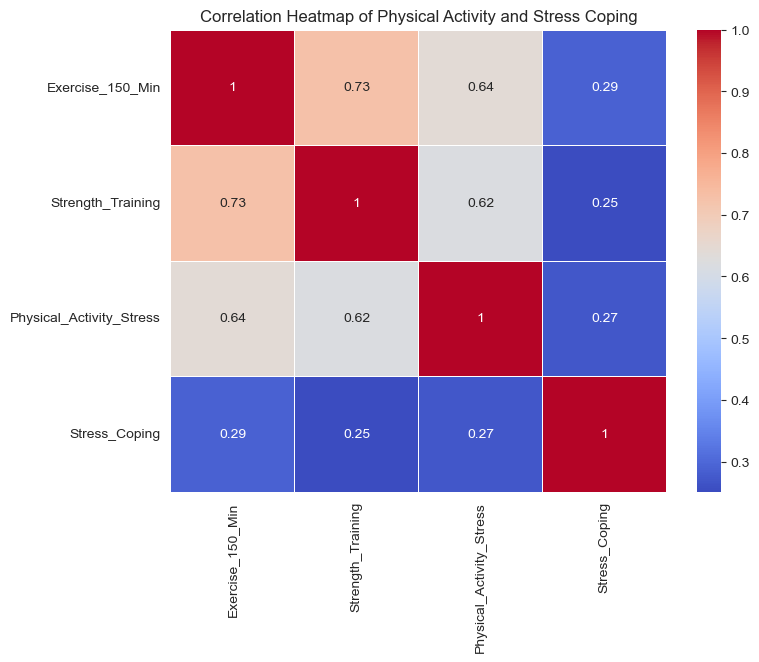

In [38]:
# Correlation heatmap of physical-related variables and Stress_Coping

corr = data[['Exercise_150_Min', 'Strength_Training', 'Physical_Activity_Stress', 'Stress_Coping']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap of Physical Activity and Stress Coping")
plt.show()

# Physical_Activity_Stress, Exercise_150_Min, and Strength_Training are positively correlated (≥0.6), which is expected since these variables all relate to physical activity.
# Stress_Coping has a slightly positive correlation (~0.27-0.29) with physical activity variables, indicating that students who engage in more physical activity tend to feel more confident in coping with stress.
# Study_Skills has a slight correlation (~0.23-0.28) with physical activity, but it still suggests a potential positive effect of exercise on academic confidence.

In [25]:
# ---- MULTIPLE LINEAR REGRESSION: PREDICTING PHYSICAL ACTIVITY AS A COPING MECHANISM ----
# Note: these are variables I assumed to be important. Output --> R^2 of 0.471. p-values are iffy.
# [FOR PHYSICAL_ACTIVITY_STRESS]

predictor_variables_physical = [
    "Exercise_150_Min", "Strength_Training", "Stress_Coping", "Feelings", "7_Hours_Sleep", "Controlled_Life", "Parent_Financial_Support",
    "Strong_Social_Network", "Balanced_Diet", "Close_Relationships", "Understand_Purpose"
]

X_physical = data[predictor_variables_physical] # indep variable
y_physical = data["Physical_Activity_Stress"] # dep variable
 
X_physical = X_physical.fillna(X_physical.mean())
y_physical = y_physical.fillna(y_physical.mean())

# Add a constant term for the regression model
X_physical = sm.add_constant(X_physical)

model_physical = sm.OLS(y_physical, X_physical).fit()

print(model_physical.summary())

                               OLS Regression Results                               
Dep. Variable:     Physical_Activity_Stress   R-squared:                       0.477
Model:                                  OLS   Adj. R-squared:                  0.471
Method:                       Least Squares   F-statistic:                     87.97
Date:                      Wed, 26 Mar 2025   Prob (F-statistic):          5.10e-141
Time:                              09:35:13   Log-Likelihood:                -1187.7
No. Observations:                      1075   AIC:                             2399.
Df Residuals:                          1063   BIC:                             2459.
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [50]:
# ---- MULTIPLE LINEAR REGRESSION: PREDICTING PHYSICAL ACTIVITY AS A COPING MECHANISM ----
# Note: This is AFTER running stepwise regression in R.
# p-values are significant and R^2 is approximately 0.5
# [FOR PHYSICAL_ACTIVITY_STRESS]

clean_data = data.dropna()

final_predictors = [
    'Club_Sports', 'Social_Sorority/Fraternity', 'Exercise_150_Min', 
    'Strength_Training', 'Healthy_Meal_Choices',
    'Avoid_Alcohol', 'Regular_Medical_Visits', 'Manage_Conflict', 
    'Feelings', 'Body_Image', 'Learn_New_Things', 'Challenges_Growth', 'Current_Events', 
    'Personal_Values', 'Spirituality_Hardship', 'Track_Spending', 
    'Financial_Anxiety', 'Future_Financial_Plan', 'Contribution', 'Family_Grad_History', 
    'Controlled_Life', 'Openness', 'Budget' # Based on statistical significance
]

X_final = clean_data[final_predictors]
y_final = clean_data["Physical_Activity_Stress"]

X_final = sm.add_constant(X_final)

final_model = sm.OLS(y_final, X_final).fit()

print(final_model.summary())

# Analysis and interpretation:
# - Exercise and strength training remain strong positive predictors of using physical activity to cope with stress.
# - Involvement in club sports and social organizations (like sororities/fraternities) also seems to be beneficial.
# - The added predictors from R, like "Controlled_Life", "Openness", and "Budget", may provide additional insights into personal and financial factors affecting physical activity as a coping mechanism.

                               OLS Regression Results                               
Dep. Variable:     Physical_Activity_Stress   R-squared:                       0.510
Model:                                  OLS   Adj. R-squared:                  0.498
Method:                       Least Squares   F-statistic:                     43.39
Date:                      Wed, 26 Mar 2025   Prob (F-statistic):          3.35e-131
Time:                              10:24:20   Log-Likelihood:                -1055.6
No. Observations:                       983   AIC:                             2159.
Df Residuals:                           959   BIC:                             2277.
Df Model:                                23                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

C:\Users\wolzi\AppData\Local\Temp\ipykernel_16168\2427810041.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.values, y=coefs.index, palette="rocket")


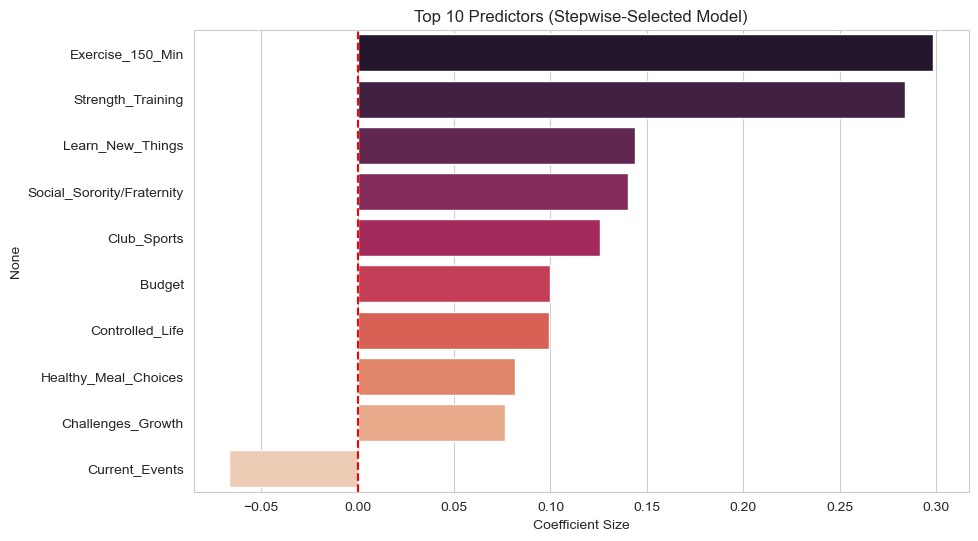

In [52]:
# --- VISUALIZATION FOR STEPWISE MODEL ---

coefs = final_model.params[1:].sort_values(key=abs, ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=coefs.values, y=coefs.index, palette="rocket")
plt.axvline(0, color='red', linestyle='--')
plt.title("Top 10 Predictors")
plt.xlabel("Coefficient Size")
plt.ylabel("Significant Predictors")
plt.show()

# Model identifies Exercise_150_Min and Strength_Training to be the strongest predictors of using physical activity for stress management/coping
# Also identifies variables like Learn_New_Things and engaging in a fraternity or sorority, or club sports play a "secondary" role.
# Less engagement in current events may result in relying more on physical activity for stress.

In [27]:
# LOGISITIC REGRESSION for the above model [FOR PHYSICAL_ACTIVITY_STRESS]

clean_data = data.dropna()

final_predictors = [
    'Club_Sports', 'Social_Sorority/Fraternity',
    'Religious/Campus_Ministry', 'Exercise_150_Min', 
    'Strength_Training', 'Healthy_Meal_Choices',
    'Avoid_Alcohol', 'Regular_Medical_Visits', 'Manage_Conflict', 
    'Feelings', 'Body_Image', 'Learn_New_Things', 'Challenges_Growth', 'Current_Events', 
    'Personal_Values', 'Spirituality_Hardship', 'Track_Spending', 
    'Financial_Anxiety', 'Future_Financial_Plan', 'Contribution', 'Family_Grad_History', 
    'Controlled_Life', 'Openness', 'Budget' # Based on statistical significance
]

# Define X and y
X_final = clean_data[final_predictors]
y_final = clean_data["Physical_Activity_Stress"].astype(pd.CategoricalDtype(ordered=True))

# Fit an Ordinal Logistic Regression model
ordinal_model = OrderedModel(y_final, X_final, distr="logit")
result = ordinal_model.fit(method="bfgs")

# Print the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.961177
         Iterations: 62
         Function evaluations: 65
         Gradient evaluations: 65
                                OrderedModel Results                                
Dep. Variable:     Physical_Activity_Stress   Log-Likelihood:                -944.84
Model:                         OrderedModel   AIC:                             1944.
Method:                  Maximum Likelihood   BIC:                             2076.
Date:                      Wed, 26 Mar 2025                                         
Time:                              09:35:19                                         
No. Observations:                       983                                         
Df Residuals:                           956                                         
Df Model:                                24                                         
                                 coef    std err          z    

C:\Users\wolzi\AppData\Local\Temp\ipykernel_16168\2538396678.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=odds_ratios, y=significant, palette="Blues_d")


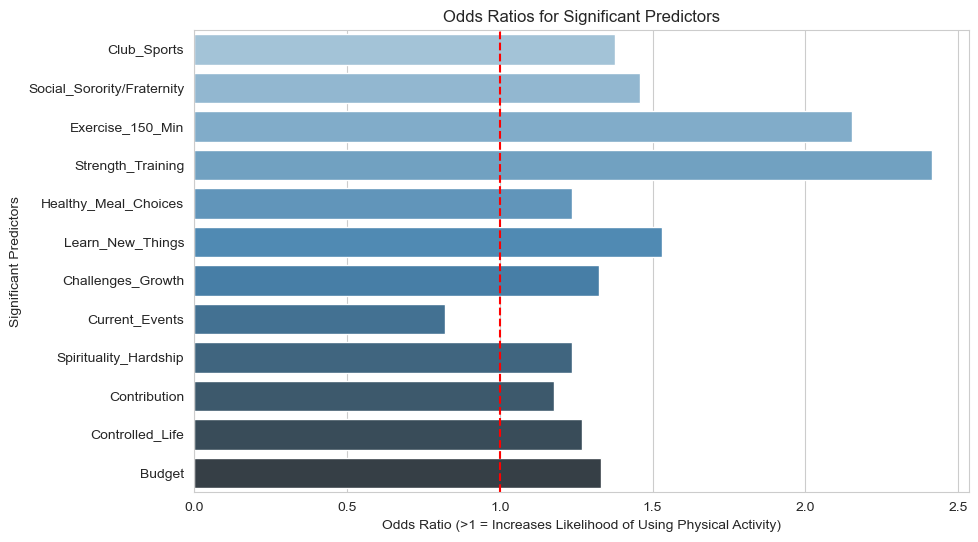

In [46]:
# --- ORDINAL LOGISTIC REGRESSION VISUALIZATION ---
# Extract significant predictors (p < 0.05)
significant = result.pvalues[result.pvalues < 0.05].index[:-3]  # Exclude cutoffs
odds_ratios = np.exp(result.params[significant])

plt.figure(figsize=(10, 6))
sns.barplot(x=odds_ratios, y=significant, palette="Blues_d")
plt.axvline(1, color='red', linestyle='--')  # Neutral odds ratio
plt.title("Odds Ratios for Significant Predictors")
plt.xlabel("Odds Ratio (>1 = Increases Likelihood of Using Physical Activity)")
plt.ylabel("Significant Predictors")
plt.show()

# Confirms that Exercising 150 + minutes and engaging in strength training more than doubles the likelihood of using physical activity for stress (OR > 2)
# Control over Budget, or perception of a controlled life, increases the likelihood of using physical activity for stress.

C:\Users\wolzi\AppData\Local\Temp\ipykernel_16168\858894575.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_15_importance_df, palette="Blues_r")


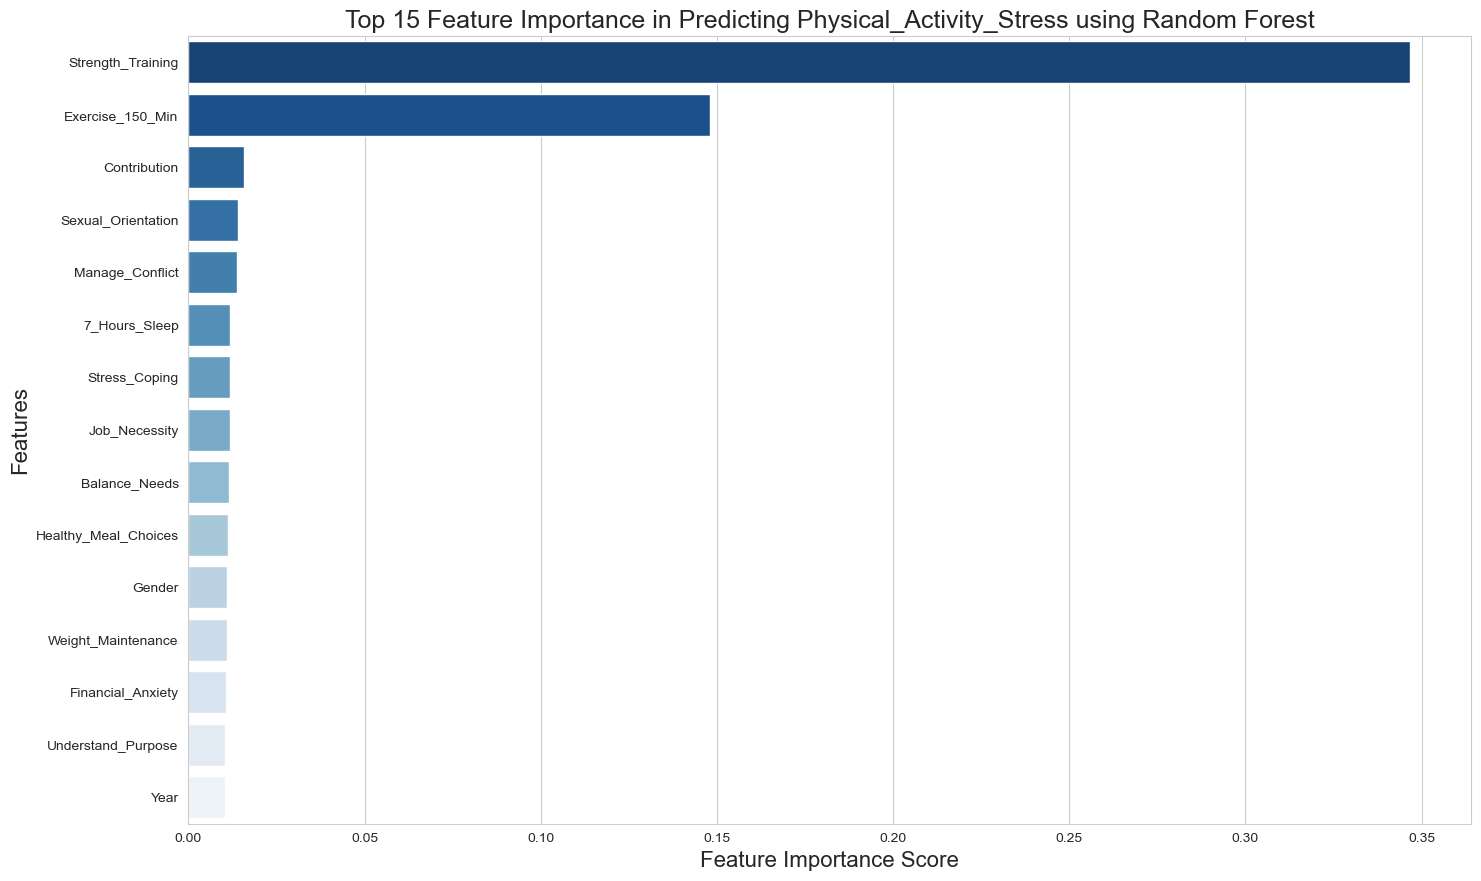

In [28]:
# Random Forest Variable Importance plot for Physical_Activity_Stress without gradient boosting

# This model DOES NOT take into account the ordinal nature of Physical_Activity_Stress

# Exclude the score variables
score_variables = ["Physical_Score", "Relational_Score", "Spiritual_Score", "Intellectual_Score", "Financial_Score"]

X = df_rf.drop(columns=["Physical_Activity_Stress"] + score_variables)
y = df_rf["Physical_Activity_Stress"]  # Change target variable to Physical_Activity_Stress

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Limit to top 15 most important features
top_15_importance_df = importance_df.head(15)

plt.figure(figsize=(16,10)) 
sns.barplot(x="Importance", y="Feature", data=top_15_importance_df, palette="Blues_r")

plt.xlabel("Feature Importance Score", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.title("Top 15 Feature Importance in Predicting Physical_Activity_Stress using Random Forest", fontsize=18)

plt.tight_layout(pad=5.0) 

plt.show()

C:\Users\wolzi\AppData\Local\Temp\ipykernel_16168\932038398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Club_Sports', y='Physical_Activity_Stress', data=data, palette='Set2')


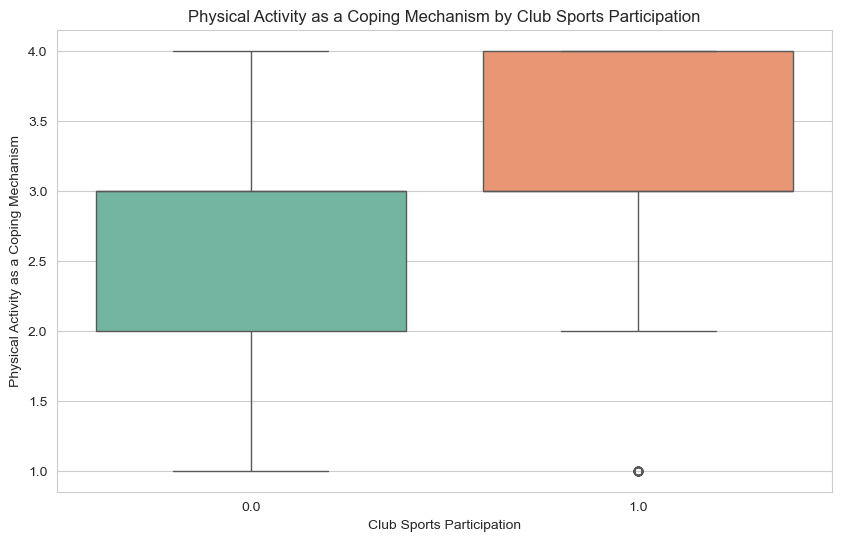

In [32]:
# Box plots for categorical predictors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Club_Sports', y='Physical_Activity_Stress', data=data, palette='Set2')
plt.title('Physical Activity as a Coping Mechanism by Club Sports Participation')
plt.xlabel('Club Sports Participation')
plt.ylabel('Physical Activity as a Coping Mechanism')
plt.show()

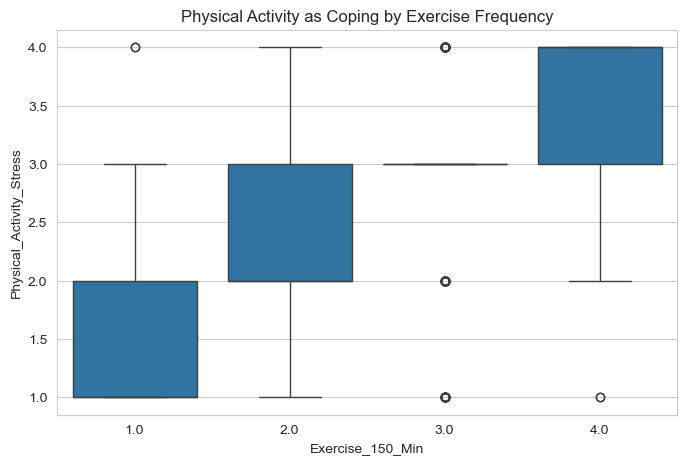

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exercise_150_Min', y='Physical_Activity_Stress', data=data)
plt.title("Physical Activity as Coping by Exercise Frequency")
plt.show()

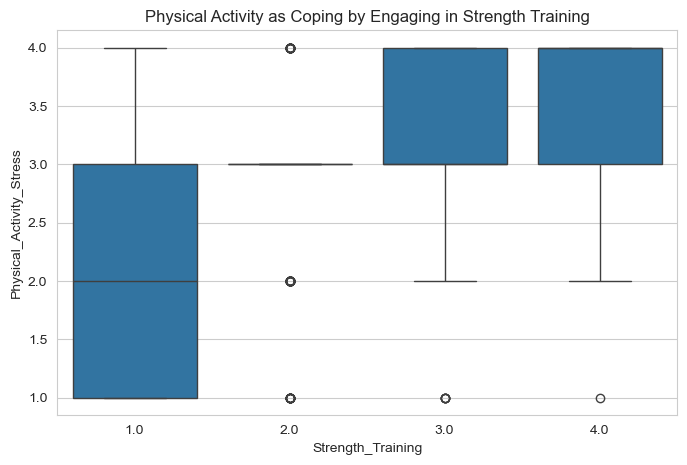

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Strength_Training', y='Physical_Activity_Stress', data=data)
plt.title("Physical Activity as Coping by Engaging in Strength Training")
plt.show()

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Prepare data (using your key predictors)
predictors = ['Exercise_150_Min', 'Strength_Training', 'Club_Sports', 'Budget', 'Controlled_Life']
X = data[predictors].fillna(data[predictors].mean())
y_numeric = data['Physical_Activity_Stress'].fillna(data['Physical_Activity_Stress'].mean())

# Train model with OOB scoring
rf_reg = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=42)
rf_reg.fit(X, y_numeric)

# Get OOB error metrics
oob_pred_numeric = rf_reg.oob_prediction_
mae_numeric = mean_absolute_error(y_numeric, oob_pred_numeric)
rmse_numeric = np.sqrt(mean_squared_error(y_numeric, oob_pred_numeric))

print("Numeric Model (Random Forest Regression):")
print(f"OOB MAE: {mae_numeric:.3f}, OOB RMSE: {rmse_numeric:.3f}")

# NOTE:
# I ran an RF treating Physical_Activity_Stress as categorical (since it's ordinal).
# OOB for that: 0.193, Log Loss: 2.127 [LL > 1 leads to uncertainty]

# This model interpretation:
# On a Likert-scale, so OOB MAE ~ 0.624 means, that if the true value is 2, the predicted is (1.38, 2.62)

Numeric Model (Random Forest Regression):
OOB MAE: 0.624, OOB RMSE: 0.785
